# Building a Naive Bayes model to predict customer churn

In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [2]:
# import the required packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [11]:
#import the dataset
url = 'https://raw.githubusercontent.com/sharmaroshan/Churn-Modelling-Dataset/master/Churn_Modelling.csv'
df_original = pd.read_csv(url)

In [13]:
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [15]:
#Drop the feature with no significant impact on target variable (Exited)
churn_df = df_original.drop(['RowNumber', 'CustomerId', 'Surname', 'Gender'], axis=1)

In [16]:
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [17]:
# Create loyalty feature (Feature Extraction)
churn_df['Loyalty'] = churn_df['Tenure']/churn_df['Age']

In [18]:
churn_df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty
0,619,France,42,2,0.00,1,1,1,101348.88,1,0.047619
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,0.024390
2,502,France,42,8,159660.80,3,1,0,113931.57,1,0.190476
3,699,France,39,1,0.00,2,0,0,93826.63,0,0.025641
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,0.046512


In [20]:
# Transform the Geography feature from categorical into numeric (Feature Transformation)
# Unique value of Geography 
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [21]:
# Dummy encode categorical variable
churn_df = pd.get_dummies(churn_df, drop_first=True)

In [22]:
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [23]:
# check the class balance
churn_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [25]:
# To adhere to the Naive bayes model assumption of independencies in the predictor variable, we drop the Tenure and Age as we have already created a new feature Loyalty from these two
churn_df = churn_df.drop(['Tenure', 'Age'], axis=1)

In [26]:
churn_df.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [28]:
# Define the target(Y) variable
y = churn_df['Exited']

# Define the predictor(X) variable
x = churn_df.copy()
x = x.drop('Exited', axis=1)

# Split the data 
# Notice that we include the argument stratify equals Y. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. Equals Y tells the function that it should use the class ratio found in the Y variable, which is our target. The less data you have overall and the greater your class imbalance, the more important it is to stratify when you split the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y, random_state = 42)

In [30]:
# Fit the model
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(x_test)

In [31]:
# Evaluate the model based on the metrics
print("Accuracy: ", accuracy_score(y_test, y_preds))
print("Recall: ", recall_score(y_test, y_preds))
print("F1 score: ", f1_score(y_test, y_preds))
print("Precision: ", precision_score(y_test, y_preds))

Accuracy:  0.7964
Recall:  0.0
F1 score:  0.0
Precision:  0.0


/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
# Check unique value of predictions
np.unique(y_preds)

array([0])

Okay, the model predicted zero or not churned for every sample in the test data. 

In [34]:
# Describe the input data
x.describe()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Loyalty,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.137936,0.250900,0.247700
std,96.653299,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.089506,0.433553,0.431698
min,350.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.064516,0.000000,0.000000
50%,652.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.129032,0.000000,0.000000
75%,718.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.200000,1.000000,0.000000
max,850.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,0.555556,1.000000,1.000000


Something that stands out is that the loyalty variable we created is on a vastly different scale than some of the other variables we have such as balance or estimated salary. The maximum value of loyalty is 0.56, while the maximum value for balance is over 250,000. Almost six orders of magnitude greater. One thing that you can try when modeling is scaling your predictor variables. Some models require you to scale the data in order for them to operate as expected, while others don't. Naive Bayes does not require data scaling. However, sometimes packages and libraries need to make assumptions and approximations in their calculations. We're already breaking some of these assumptions by using the GaussianNB classifier on this data set. And it may not be helping that some of our predictor variables are on very different scales. In general, scaling might not improve the model, but it probably won't make it worse.

In [35]:
# Import the scaler the function
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(x_train)

# Scale the training data
x_train = scaler.transform(x_train)

# Scale the test data
x_test = scaler.transform(x_test)

In [36]:
# Fit the model again, this time to the scaled data
gnb_scaled = GaussianNB()
gnb_scaled.fit(x_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(x_test)

In [37]:
def conf_matrix_plot(model, x_data, y_data):
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

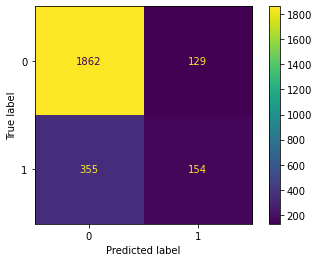

In [38]:
conf_matrix_plot(gnb_scaled, x_test, y_test)

In [40]:
# Evaluate the model again based on the metrics
print("Accuracy: ", accuracy_score(y_test, scaled_preds))
print("Recall: ", recall_score(y_test, scaled_preds))
print("F1 score: ", f1_score(y_test, scaled_preds))
print("Precision: ", precision_score(y_test, scaled_preds))

Accuracy:  0.8064
Recall:  0.3025540275049116
F1 score:  0.3888888888888889
Precision:  0.5441696113074205


This looks certainly better than the previous one!